# Robot Exploration Mission

Coding q learning algorithm with python.

## 1. Create RobotExploration Class

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class RobotExploration:
    def __init__(self, size = 5):
        self.size = size # 5x5 grid
        self.state_space = size * size # 25
        self.action_space = 4 # up, down, left, right
        self.start_state = (0, 0) # starting position
        self.goal_states = [(4, 4), (1, 3)] # goal states
        self.obstacles = [(2, 2), (3, 3)] # obstacles
        self.lab = np.zeros((size, size)) # 5x5 grid 
    
    def reset(self):
        self.robot_position = self.start_state
        return self.robot_position
    
    def step(self, action):
        x, y = self.robot_position

        if action == 0: # up
            x = max(0, x-1) # 0 is the minimum value for x
        elif action == 1: # down
            x = min(self.size-1, x+1) # self.size-1 is the maximum value for x
        elif action == 2: # left
            y = max(0, y-1)
        elif action == 3: # right
            y = min(self.size-1, y+1)

        self.robot_position = (x, y)

        if self.robot_position in self.goal_states: # if the robot is in the goal state
            return self.robot_position, 10, True # return the goal state, reward 1, and done True
        elif self.robot_position in self.obstacles: # if the robot is in the obstacle state
            return self.robot_position, -5, False # return the obstacle state, reward -1, and done False
        else:
            return self.robot_position, 0, False

## 2. Create Q learning Agent Class

In [3]:

class QLearningAgent:
    def __init__(self, env):
        self.env = env # environment
        self.q_table = np.zeros((env.state_space, env.action_space)) # initialize q_table
        self.alpha = 0.1 # learning rate
        self.gamma = 0.99 # discount factor
        self.epsilon = 1.0 # exploration rate
        self.epsilon_decay = 0.995 # epsilon decay
        self.min_epsilon = 0.01 # minimum exploration rate

    def get_state_index(self, state):
        return state[0] * self.env.size + state[1] # return the index of the state

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon: # if the random number is less than the exploration rate
            return random.randint(0, self.env.action_space - 1) # return a random action
        else:
            return np.argmax(self.q_table[self.get_state_index(state)]) # return the action with the highest q_value
    def learn(self, state, action, reward, next_state):
        state_idx = self.get_state_index(state) # get the index of the state
        next_state_idx = self.get_state_index(next_state) # get the index of the next state
        best_next_action = np.argmax(self.q_table[next_state_idx]) # get the action with the highest q_value
        td_target = reward + self.gamma * self.q_table[next_state_idx][best_next_action] # calculate the td_target
        td_delta = td_target - self.q_table[state_idx][action] # calculate the td_delta
        self.q_table[state_idx][action] += self.alpha * td_delta # update the q_value

## 3. Training and Testing

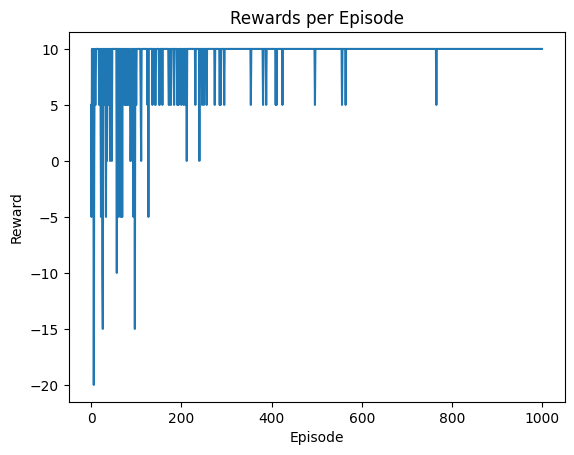

In [4]:
env = RobotExploration()
agent = QLearningAgent(env)
episodes = 1000
rewards_per_episode = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state
        total_reward += reward

    agent.epsilon = max(agent.min_epsilon, agent.epsilon * agent.epsilon_decay) # decay the exploration rate
    rewards_per_episode.append(total_reward)

plt.plot(rewards_per_episode) # plot the rewards per episode
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()